# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information for the Open Weather api.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = url + "appid=" + weather_api_key + "&q="

# set up lists to hold reponse info
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Loop through the list of cities and perform a request for data on each
for city in cities:

    response = requests.get(query_url + city + "&units=" + units).json()

 # Try to append lists if the city is found
    try:
        city_name.append(response["name"])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Processing Record {(cities.index(city))} out of {str(len(cities))} - Appending stats for {city}")
    except KeyError:
        print(f"City not found! Skipping")
        pass
    
print("---------------------------")
print("Data Retrieval Complete")

Processing Record 0 out of 621 - Appending stats for bredasdorp
City not found! Skipping
Processing Record 2 out of 621 - Appending stats for atuona
Processing Record 3 out of 621 - Appending stats for qandala
Processing Record 4 out of 621 - Appending stats for ancud
Processing Record 5 out of 621 - Appending stats for hermanus
Processing Record 6 out of 621 - Appending stats for ilulissat
Processing Record 7 out of 621 - Appending stats for port alfred
Processing Record 8 out of 621 - Appending stats for ostrovnoy
Processing Record 9 out of 621 - Appending stats for butaritari
Processing Record 10 out of 621 - Appending stats for new norfolk
Processing Record 11 out of 621 - Appending stats for shimoda
Processing Record 12 out of 621 - Appending stats for alyangula
Processing Record 13 out of 621 - Appending stats for busselton
Processing Record 14 out of 621 - Appending stats for cape town
Processing Record 15 out of 621 - Appending stats for karera
Processing Record 16 out of 621 -

Processing Record 139 out of 621 - Appending stats for porto velho
Processing Record 140 out of 621 - Appending stats for tautira
Processing Record 141 out of 621 - Appending stats for puerto leguizamo
Processing Record 142 out of 621 - Appending stats for barrow
Processing Record 143 out of 621 - Appending stats for kroya
Processing Record 144 out of 621 - Appending stats for sao felix do xingu
Processing Record 145 out of 621 - Appending stats for noyabrsk
Processing Record 146 out of 621 - Appending stats for schwerin
Processing Record 147 out of 621 - Appending stats for praya
Processing Record 148 out of 621 - Appending stats for ransang
Processing Record 149 out of 621 - Appending stats for ariano irpino
Processing Record 150 out of 621 - Appending stats for east london
Processing Record 151 out of 621 - Appending stats for cidreira
Processing Record 152 out of 621 - Appending stats for dubna
Processing Record 153 out of 621 - Appending stats for chimoio
Processing Record 154 out

Processing Record 269 out of 621 - Appending stats for mount gambier
Processing Record 270 out of 621 - Appending stats for muros
Processing Record 271 out of 621 - Appending stats for dhone
Processing Record 272 out of 621 - Appending stats for mogadishu
Processing Record 273 out of 621 - Appending stats for ginda
City not found! Skipping
Processing Record 275 out of 621 - Appending stats for buenos aires
Processing Record 276 out of 621 - Appending stats for la palma
Processing Record 277 out of 621 - Appending stats for pontianak
Processing Record 278 out of 621 - Appending stats for rocha
Processing Record 279 out of 621 - Appending stats for balkhash
Processing Record 280 out of 621 - Appending stats for boguchany
Processing Record 281 out of 621 - Appending stats for srandakan
Processing Record 282 out of 621 - Appending stats for bardiyah
Processing Record 283 out of 621 - Appending stats for tessalit
Processing Record 284 out of 621 - Appending stats for lithakia
Processing Rec

Processing Record 406 out of 621 - Appending stats for marsa matruh
Processing Record 407 out of 621 - Appending stats for palafrugell
Processing Record 408 out of 621 - Appending stats for scottsbluff
Processing Record 409 out of 621 - Appending stats for borzna
Processing Record 410 out of 621 - Appending stats for clarence town
Processing Record 411 out of 621 - Appending stats for koumac
Processing Record 412 out of 621 - Appending stats for port lincoln
Processing Record 413 out of 621 - Appending stats for middlebury
Processing Record 414 out of 621 - Appending stats for peniche
Processing Record 415 out of 621 - Appending stats for bantry
Processing Record 416 out of 621 - Appending stats for fukue
Processing Record 417 out of 621 - Appending stats for coahuayana
City not found! Skipping
Processing Record 419 out of 621 - Appending stats for skerries
Processing Record 420 out of 621 - Appending stats for chokurdakh
Processing Record 421 out of 621 - Appending stats for macamic
P

Processing Record 541 out of 621 - Appending stats for kaka
Processing Record 542 out of 621 - Appending stats for vicuna
Processing Record 543 out of 621 - Appending stats for mackay
Processing Record 544 out of 621 - Appending stats for neryungri
Processing Record 545 out of 621 - Appending stats for beringovskiy
Processing Record 546 out of 621 - Appending stats for oyotun
Processing Record 547 out of 621 - Appending stats for geraldton
Processing Record 548 out of 621 - Appending stats for andenes
Processing Record 549 out of 621 - Appending stats for tateyama
Processing Record 550 out of 621 - Appending stats for miramar
Processing Record 551 out of 621 - Appending stats for yafran
Processing Record 552 out of 621 - Appending stats for mangan
Processing Record 553 out of 621 - Appending stats for sanchazi
Processing Record 554 out of 621 - Appending stats for caravelas
Processing Record 555 out of 621 - Appending stats for springdale
Processing Record 556 out of 621 - Appending st

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Convert Raw data to DataFrame

df = pd.DataFrame({
    'City': city_name,
    'Latitude': lat,
    'Longitude': lng,
    'Max temperature': max_temp,
   'Humidity' : humidity,
    'Cloudiness' :cloudiness,
    'Wind Speed' :wind_speed,
    'Country' : country,
    'Date' : date,
})

#Exporting the DataFrame into a csv
df.to_csv('output_data/cities_weather.csv')
df.count()

City               573
Latitude           573
Longitude          573
Max temperature    573
Humidity           573
Cloudiness         573
Wind Speed         573
Country            573
Date               573
dtype: int64

In [5]:
df.head()

,City,Latitude,Longitude,Max temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.53,20.04,48.20,93,0,4.70,ZA,1593572642
1,Atuona,-9.80,-139.03,79.83,74,3,21.74,PF,1593572377
2,Qandala,11.47,49.87,91.29,48,100,9.57,SO,1593572539
3,Ancud,-41.87,-73.82,50.00,100,90,12.75,CL,1593572528
4,Hermanus,-34.42,19.23,59.45,65,0,3.47,ZA,1593572366


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
sort_df = df.sort_values("Humidity", ascending = False)
sort_df.head()

#There are no cities with humidity > 100%

,City,Latitude,Longitude,Max temperature,Humidity,Cloudiness,Wind Speed,Country,Date
419,Palmer,42.16,-72.33,68.0,100,90,3.36,US,1593572814
48,Arrondissement de Vannes,47.83,-2.50,64.0,100,90,9.17,FR,1593572660
380,Middlebury (village),44.02,-73.17,64.0,100,40,1.01,US,1593572798
385,Skerries,53.58,-6.11,55.0,100,75,4.70,IE,1593572801
406,Poykovskiy,61.23,73.33,55.4,100,99,6.71,RU,1593572809


In [7]:
#  Get the indices of cities that have humidity over 100%.
#NA

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

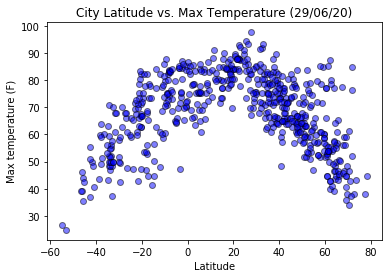

In [10]:
x = df["Latitude"] 
y = df["Max temperature"]

plt.scatter(x,y, color='blue', edgecolor = 'black', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.title('City Latitude vs. Max Temperature (29/06/20)')
plt.savefig('images/Latitude_vs_MaxTemp.png')
plt.show()

There is a strong relationship between the latitude and max temperature of cities. The further from the equator the colder they are. However the hottest cities are not on the equator line but at a latitude at around +20.

## Latitude vs. Humidity Plot

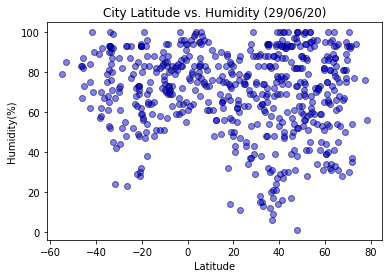

In [11]:
x = df["Latitude"] 
y = df["Humidity"]

plt.scatter(x,y, color='blue', edgecolor = 'black', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs. Humidity (29/06/20)')
plt.savefig("images/latitude_vs_humidity.png")
plt.show()

There isn't really a relationship between latidue of cities and their humidity level.

## Latitude vs. Cloudiness Plot

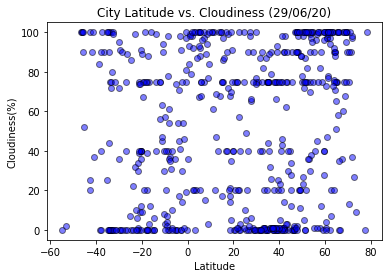

In [12]:
x = df["Latitude"] 
y = df["Cloudiness"]

plt.scatter(x,y, color='blue', edgecolor = 'black', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs. Cloudiness (29/06/20)')
plt.savefig("images/latitude_vs_cloudiness.png")
plt.show()

There isn't any relationship between latitude and cloudiness in cities.

## Latitude vs. Wind Speed Plot

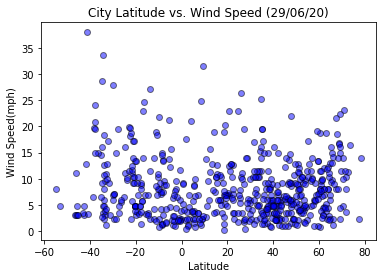

In [13]:
x = df["Latitude"] 
y = df["Wind Speed"]

plt.scatter(x,y, color='blue', edgecolor = 'black', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('City Latitude vs. Wind Speed (29/06/20)')
plt.savefig("images/latitude_vs_windspeed.png")
plt.show()

There isn't any relationship between latitude and wind speed.

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots
def linereg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(5,32),fontsize=15,color="red")
    plt.scatter(x_values,y_values, alpha=0.5)
    plt.plot(x_values,regress_values,"r-")
    return print(f"The r-squared is: {rvalue**2}")
    return plt.show()

In [15]:
# Create Northern and Southern Hemisphere DataFrames

#Northern Hemisphere DataFrame
north_df = df.loc[df['Latitude']> 0]
north_df.count()

City               395
Latitude           395
Longitude          395
Max temperature    395
Humidity           395
Cloudiness         395
Wind Speed         395
Country            395
Date               395
dtype: int64

In [16]:
#Southern Hemisphere DataFrame
south_df = df.loc[df['Latitude']<= 0]
south_df.count()

City               178
Latitude           178
Longitude          178
Max temperature    178
Humidity           178
Cloudiness         178
Wind Speed         178
Country            178
Date               178
dtype: int64

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.46637587575105344


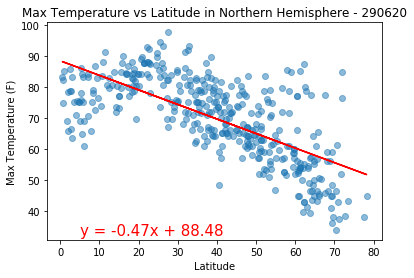

In [17]:
x= north_df['Latitude']
y= north_df['Max temperature']

linereg_plot(x,y)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Max Temperature vs Latitude in Northern Hemisphere - 290620')
plt.savefig('images/NH_Maxtemp_vs_Latitude.png')

There is a negative relationship between latitude and max temperature in the Northern hemisphere. However the r-squared is not that strong. By watching this scatter plot, it looks like the relationship between latitude and temperature would be much stronger if we were taking in account cities with a latitude superior or equal to 20.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5205971135019757


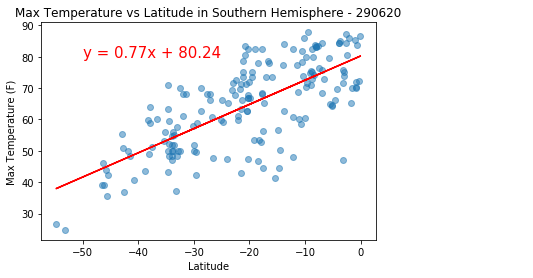

In [18]:
x= south_df['Latitude']
y= south_df['Max temperature']

linereg_plot(x,y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Max Temperature vs Latitude in Southern Hemisphere - 290620')
plt.savefig('images/SH_Maxtemp_vs_Latitude.png')

There is a much stronger relationship between the latitude and the max temperature in the Southern hemisphere. The r-squared number is above 0.50.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0027849939923392194


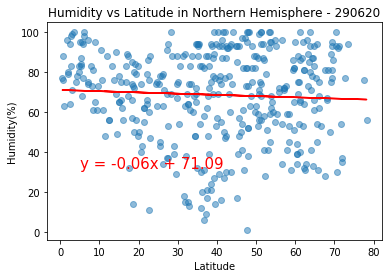

In [19]:
x= north_df['Latitude']
y= north_df['Humidity']

linereg_plot(x,y)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('Humidity vs Latitude in Northern Hemisphere - 290620')
plt.savefig('images/NH_Humidity_vs_Latitude.png')

There isn't any relationship between humidity and latitude of cities in the Northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0003580759713279556


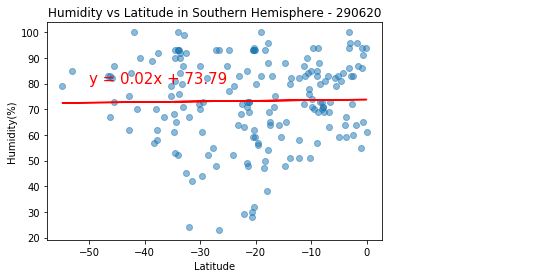

In [20]:
x= south_df['Latitude']
y= south_df['Humidity']

linereg_plot(x,y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('Humidity vs Latitude in Southern Hemisphere - 290620')
plt.savefig('images/SH_Humidity_vs_Latitude.png')

There isn't any relationship between humidity and latitude of cities in the Southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.004883762629467413


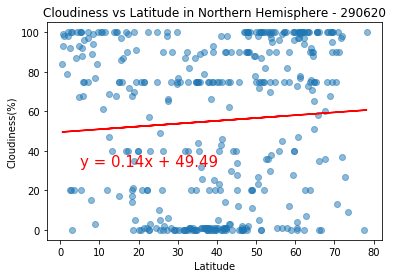

In [21]:
x= north_df['Latitude']
y= north_df['Cloudiness']

linereg_plot(x,y)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('Cloudiness vs Latitude in Northern Hemisphere - 290620')
plt.savefig('images/NH_Cloudiness_vs_Latitude.png')

There isn't any relationship between cloudiness and latitude of cities in the Northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.015974463655984386


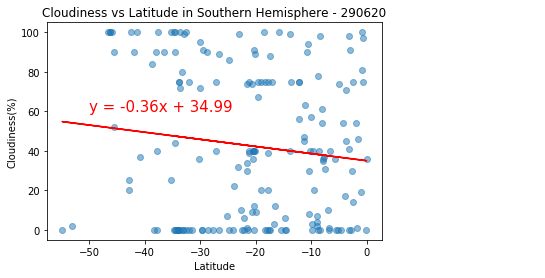

In [22]:
x= south_df['Latitude']
y= south_df['Cloudiness']

linereg_plot(x,y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('Cloudiness vs Latitude in Southern Hemisphere - 290620')
plt.savefig('images/SH_Cloudiness_vs_Latitude.png')

There isn't any relationship between cloudiness and latitude in the Southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.011083249834876945


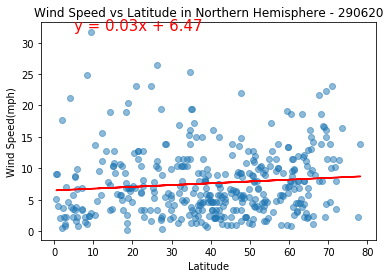

In [23]:
x= north_df['Latitude']
y= north_df['Wind Speed']

linereg_plot(x,y)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('Wind Speed vs Latitude in Northern Hemisphere - 290620')
plt.savefig('images/NH_WindSpeed_vs_Latitude.png')

There isn't any relationship between wind speed and latitude in the Northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.032607419065588644


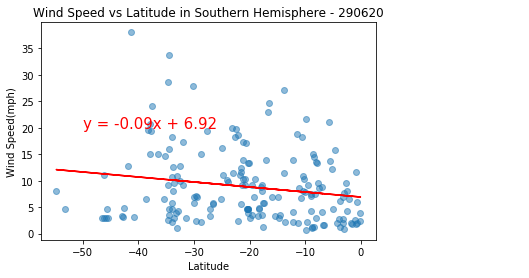

In [24]:
x= south_df['Latitude']
y= south_df['Wind Speed']

linereg_plot(x,y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('Wind Speed vs Latitude in Southern Hemisphere - 290620')
plt.savefig('images/SH_Wind Speed_vs_Latitude.png')

There isn't any relationship between wind speed and latitude in the Southern hemisphere.

Observable trends:

Thanks to this analysis, there is a strong relationship between the latitude and max temperature of cities. The further the cities are from the equator, the colder the cities tend to be. However the hottest cities are not on the equator line but at a latitude at around +20.

When comparing the latitude vs max temperature in the Northern hemisphere and the Southern hemisphere, the linear regression model shows:
     - there is a negative relationship in the Northern hemisphere. 
     - there is a positive relationship in the Southern hemisphere.   
 
In addition, the relationship and r-squared are much stronger in the Southern Hemisphere.
 
By looking at the first scatter plot latitude vs max. temperature, we can see the cities with the highest temperatures are located on the latitude +20. Therefore the relationship between latitude and temperature would be much stronger if we were grouping cities with a latitude superior to 20 and cities with a latitude inferior to 20 instead of looking at Northen hemisphere and Southern hemisphere.

In regards to the other parameters, there isn't any strong relationship between latitude and cloudiness, humidity, or wind speed.